Nonlinear Regression


17.8 Fit the following data with the power model (y = ax^b ). Use
the resulting power equation to predict y at x = 9:


x [2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20]


y [13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3]


Problem from "Numerical Methods for Engineers, SIXTH EDITION" by S. Chapra and R. Canale

In [1]:
from scipy.optimize import least_squares
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

In [2]:
x_data = np.array([2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
y_data = np.array([13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3])

In [3]:
def function(x, a, b):
    return a*(x**b)

In [4]:
def residuals(p, x, y):
    return y - function(x, *p)

In [5]:
x0 = [1., 1.]

In [17]:
fit = least_squares(residuals, x0, loss='soft_l1', f_scale=0.5, args=(x_data, y_data))

In [18]:
fit

 active_mask: array([0., 0.])
        cost: 0.14610226991467956
         fun: array([-0.00455776,  0.1863667 , -0.39276526,  0.15324653, -0.12005984,
        0.11895707, -0.18072773, -0.06883307,  0.12578276,  0.14166657])
        grad: array([5.31173383e-10, 3.05732400e-07])
         jac: array([[ -0.6050303 , -11.91521324],
       [ -0.45635983, -12.28761829],
       [ -0.28853678,  -9.98083354],
       [ -0.35001347, -13.47894397],
       [ -0.31763874, -13.75558312],
       [ -0.27148932, -13.43568541],
       [ -0.228325  , -12.39457225],
       [ -0.22336658, -13.00068704],
       [ -0.19881005, -12.23009531],
       [ -0.18258974, -11.75630239]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 18
        njev: 16
  optimality: 3.057324002853079e-07
      status: 2
     success: True
           x: array([21.49272091, -0.54831333])

In [19]:
coefs = fit.x

In [20]:
fit_line = function(x_data, coefs[0], coefs[1])
fit_line

array([13.00455776, 10.8136333 ,  8.89276526,  8.04675347,  7.12005984,
        6.08104293,  5.38072773,  4.86883307,  4.47421724,  4.15833343])

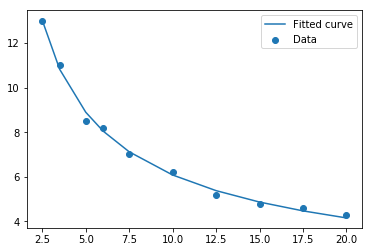

In [21]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, fit_line, label='Fitted curve')
plt.legend()
plt.show()

In [22]:
regress = linregress(x_data, fit_line)
regress

LinregressResult(slope=-0.43722948426335195, intercept=11.634525771417309, rvalue=-0.9098755344107167, pvalue=0.0002585763504036697, stderr=0.07048656449077732)

In [23]:
x = 9
y_value = function(x, coefs[0], coefs[1])
y_value

6.442694095564106